#Data Augmentation

delete mask Images:

In [ ]:
# import os
# import glob

# # Define the directory
# directory = r"..\datasets\breast_cancer\data\original_data\normal"

# # Search for all files ending with "mask.png"
# files_to_delete = glob.glob(os.path.join(directory, "*mask.png"))

# # Delete each file
# for file_path in files_to_delete:
#     try:
#         os.remove(file_path)
#         print(f"Deleted: {file_path}")
#     except Exception as e:
#         print(f"Error deleting {file_path}: {e}")

Images count in the Directory:

In [18]:
# import os
# import imghdr

# def count_images_in_directory(directory):
#     image_count = 0
#     try:
#         for root, _, files in os.walk(directory):
#             for file in files:
#                 file_path = os.path.join(root, file)
#                 if imghdr.what(file_path):
#                     image_count += 1
#     except Exception as e:
#         print(f"An error occurred: {e}")
#     return image_count

image count in subdirectories:

In [ ]:
# def count_images_in_all_subdirectories(base_directory):
#     image_counts = {}
#     try:
#         for root, dirs, _ in os.walk(base_directory):
#             for dir_name in dirs:
#                 dir_path = os.path.join(root, dir_name)
#                 num_images = count_images_in_directory(dir_path)
#                 variable_name = f"{dir_name}_num"
#                 image_counts[variable_name] = num_images
#     except Exception as e:
#         print(f"An error occurred: {e}")
#     return image_counts

# # Example usage
# base_directory_path = r'..\datasets\breast_cancer\data\original_data'
# image_counts = count_images_in_all_subdirectories(base_directory_path)

# # Access image counts
# for variable_name, count in image_counts.items():
#     print(f"{variable_name} = {count}")

benign_num = 439
malignant_num = 210
normal_num = 133


In [20]:
# total_images_count = sum(image_counts.values())
# image_ratios = {}
# for variable_name, count in image_counts.items():
#     images_ratio = count/total_images_count
#     variable_name_ration = f"{variable_name[:-4]}_ratio"
#     image_ratios[variable_name_ration] = images_ratio
#     print(f"{variable_name_ration} = {images_ratio}")

benign_ratio = 0.5613810741687979
malignant_ratio = 0.26854219948849106
normal_ratio = 0.170076726342711


delete images in directory:

In [75]:
import os
import glob

def delete_images(directory):

    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp']
    for extension in image_extensions:
        # Construct the full path pattern
        pattern = os.path.join(directory, extension)
        # Find all files that match the pattern
        for image_file in glob.glob(pattern):
            try:
                os.remove(image_file)
            except OSError as e:
                print(f'Error deleting {image_file}: {e}')

Split data:

In [ ]:
import os
import shutil
import random

def split_images(directory, output_dir1, output_dir2, output_dir3, ratio1=0.7, ratio2=0.15):

    delete_images(output_dir1)
    delete_images(output_dir2)
    delete_images(output_dir3)
    
    # Get list of all image files in the directory
    images = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    # Shuffle the list randomly
    random.shuffle(images)
    
    # Calculate the split indices
    split_index1 = int(len(images) * ratio1)
    split_index2 = int(len(images) * (ratio1 + ratio2))
    
    # Split the images into three parts
    part1 = images[:split_index1]
    part2 = images[split_index1:split_index2]
    part3 = images[split_index2:]
    
    for image in part1:
        shutil.copy2(os.path.join(directory, image), os.path.join(output_dir1, image))
    
    for image in part2:
        shutil.copy2(os.path.join(directory, image), os.path.join(output_dir2, image))
    
    for image in part3:
        shutil.copy2(os.path.join(directory, image), os.path.join(output_dir3, image))

# Example usage
base_directory = r'..\datasets\breast_cancer\data\original_data'
output_dir = r'..\datasets\breast_cancer\data' 

ratio1 = 0.7  # 70% for part1
ratio2 = 0.15  # 20% for part2 (remaining 10% will be for part3)


def split_images_subdirectories(base_directory):
    try:
        for root, dirs, _ in os.walk(base_directory):
            for dir_name in dirs:
                dir_path = os.path.join(root, dir_name)
                last_part = os.path.basename(dir_path)
                split_images(dir_path, os.path.join(output_dir, "train", last_part),
                                       os.path.join(output_dir, "valid", last_part),
                                       os.path.join(output_dir, "test", last_part), ratio1, ratio2)
    except Exception as e:
        print(f"An error occurred: {e}")

split_images_subdirectories(base_directory)

Function for Image Resizing:

In [77]:
from PIL import Image
import os

def resize_images(directory, new_width, new_height):
    resized_images = []
    for file_name in os.listdir(directory):
        try:
            with Image.open(os.path.join(directory, file_name)) as img:
                resized_img = img.resize((new_width, new_height))
                resized_images.append(resized_img)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

    return resized_images

In [78]:
###Save Images:
def save_images_resize(images, save_path):
    for i, img in enumerate(images):
        file_name = f"P_resized_{i}.jpg"
        img.save(os.path.join(save_path, file_name))

In [ ]:
pictures_width = 416
pictures_height = 416

train_path = r'..\datasets\breast_cancer\data\train\malignant'
resized_data_path = r'..\datasets\breast_cancer\data\train_initial_resized\malignant'

delete_images(resized_data_path)
resized_images = resize_images(train_path, pictures_width, pictures_height)
save_images_resize(resized_images, resized_data_path)

train_path = r'..\datasets\breast_cancer\data\train\normal'
resized_data_path = r'..\datasets\breast_cancer\data\train_initial_resized\normal'

delete_images(resized_data_path)
resized_images = resize_images(train_path, pictures_width, pictures_height)
save_images_resize(resized_images, resized_data_path)

train_path = r'..\datasets\breast_cancer\data\train\benign'
resized_data_path = r'..\datasets\breast_cancer\data\train_initial_resized\benign'

delete_images(resized_data_path)
resized_images = resize_images(train_path, pictures_width, pictures_height)
save_images_resize(resized_images, resized_data_path)

Base method for aug:

In [80]:
import os
import numpy as np
from PIL import Image

def save_images(img, file_name, directory, suffix):
    base, ext = os.path.splitext(file_name)
    new_file_name = f"{base}{suffix}{ext}"
    img.save(os.path.join(directory, new_file_name))

def apply_changes_to_images(data_directory, save_directory, jumps_in_picture):
    file_names = os.listdir(data_directory)
    for file_name in file_names:
        #try:
            with Image.open(os.path.join(data_directory, file_name)) as img:
                img_array0 = np.array(img)
                img_array1 = img_array0.copy()
                img_array2 = img_array0.copy()
                img_array3 = img_array0.copy()

                if len(img_array0.shape) > 2:

                  #Horizantal Lines:
                  for x in range(1, img_array1.shape[1], jumps_in_picture):

                      #A Random color for each pixel:
                      #img_array1[x, :, :] = np.random.randint(0, 256, img_array1[x, :, :].shape)

                      #A Random color for each line:
                      img_array1[x, :, :] = np.random.randint(0, 256)

                  modified_img = Image.fromarray(img_array1, mode=img.mode)
                  save_images(modified_img, file_name, save_directory, "_h")

                  #Horizantal and Vertical Lines:
                  # for x in range(1, img_array1.shape[1], jumps_in_picture):
                  #     img_array1[:, x, :] = np.random.randint(0, 256)

                  # modified_img = Image.fromarray(img_array1, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_h_v")

                  #Vertical Lines:
                  for x in range(1, img_array2.shape[1], jumps_in_picture):
                      img_array2[:, x, :] = np.random.randint(0, 256)

                  modified_img = Image.fromarray(img_array2, mode=img.mode)
                  save_images(modified_img, file_name, save_directory, "_v")

                  # #Vertical Resize:
                  # new_height = img_array3.shape[0] - int(img_array3.shape[0]/jumps_in_picture) - 1
                  # img_v_r = np.zeros((new_height, img_array3.shape[1], img_array3.shape[2]), dtype=img_array3.dtype)
                  # counter = 0
                  # for i in range(img_array3.shape[0]):
                  #     if i % jumps_in_picture != 0:
                  #         img_v_r[counter, :, :] = img_array3[i, :, :]
                  #         counter += 1
                  #         if counter >= new_height:
                  #             break

                  # modified_img = Image.fromarray(img_v_r, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_v_r")

                  # #Horizantal Resize:
                  # new_width = img_array3.shape[1] - int(img_array3.shape[1]/jumps_in_picture) - 1
                  # img_h_r = np.zeros((img_array3.shape[0], new_width, img_array3.shape[2]), dtype=img_array3.dtype)
                  # counter = 0
                  # for i in range(img_array3.shape[1]):
                  #     if i % jumps_in_picture != 0:
                  #         img_h_r[:, counter, :] = img_array3[:, i, :]
                  #         counter += 1
                  #         if counter >= new_width:
                  #             break

                  # modified_img = Image.fromarray(img_h_r, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_h_r")

                  # #Horizantal and Vertical Resize:
                  # img_h_v_r = np.zeros((new_height, img_h_r.shape[1], img_h_r.shape[2]), dtype=img_array3.dtype)

                  # counter = 0
                  # for i in range(img_h_r.shape[0]):
                  #     if i % jumps_in_picture != 0:
                  #         img_h_v_r[counter, :, :] = img_h_r[i, :, :]
                  #         counter += 1
                  #         if counter >= new_height:
                  #             break

                  # modified_img = Image.fromarray(img_h_v_r, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_h_v_r")

                else:
                  #Horizantal Lines:
                  for x in range(1, img_array1.shape[1], jumps_in_picture):

                      #A Random color for each pixel:
                      #img_array1[x, :, :] = np.random.randint(0, 256, img_array1[x, :, :].shape)

                      #A Random color for each line:
                      img_array1[x, :] = np.random.randint(0, 256)

                  modified_img = Image.fromarray(img_array1, mode=img.mode)
                  save_images(modified_img, file_name, save_directory, "_h")

                  #Horizantal and Vertical Lines:
                  # for x in range(1, img_array1.shape[1], jumps_in_picture):
                  #     img_array1[:, x] = np.random.randint(0, 256)

                  # modified_img = Image.fromarray(img_array1, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_h_v")

                  #Vertical Lines:
                  for x in range(1, img_array2.shape[1], jumps_in_picture):
                      img_array2[:, x] = np.random.randint(0, 256)

                  modified_img = Image.fromarray(img_array2, mode=img.mode)
                  save_images(modified_img, file_name, save_directory, "_v")

                  # #Vertical Resize:
                  # new_height = img_array3.shape[0] - int(img_array3.shape[0]/jumps_in_picture) - 1
                  # img_v_r = np.zeros((new_height, img_array3.shape[1]), dtype=img_array3.dtype)
                  # counter = 0
                  # for i in range(img_array3.shape[0]):
                  #     if i % jumps_in_picture != 0:
                  #         img_v_r[counter, :] = img_array3[i, :]
                  #         counter += 1
                  #         if counter >= new_height:
                  #             break

                  # modified_img = Image.fromarray(img_v_r, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_v_r")

                  # #Horizantal Resize:
                  # new_width = img_array3.shape[1] - int(img_array3.shape[1]/jumps_in_picture) - 1
                  # img_h_r = np.zeros((img_array3.shape[0], new_width), dtype=img_array3.dtype)
                  # counter = 0
                  # for i in range(img_array3.shape[1]):
                  #     if i % jumps_in_picture != 0:
                  #         img_h_r[:, counter] = img_array3[:, i]
                  #         counter += 1
                  #         if counter >= new_width:
                  #             break

                  # modified_img = Image.fromarray(img_h_r, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_h_r")

                  # #Horizantal and Vertical Resize:
                  # img_h_v_r = np.zeros((new_height, img_h_r.shape[1]), dtype=img_array3.dtype)

                  # counter = 0
                  # for i in range(img_h_r.shape[0]):
                  #     if i % jumps_in_picture != 0:
                  #         img_h_v_r[counter, :] = img_h_r[i, :]
                  #         counter += 1
                  #         if counter >= new_height:
                  #             break

                  # modified_img = Image.fromarray(img_h_v_r, mode=img.mode)
                  # save_images(modified_img, file_name, save_directory, "_h_v_r")


In [ ]:
jumps_in_picture = 5
resized_data_path = r'..\datasets\breast_cancer\data\train_initial_resized\malignant'
augmented_data_path = r'..\datasets\breast_cancer\data\train_aug_line\malignant'

delete_images(augmented_data_path)
apply_changes_to_images(resized_data_path, augmented_data_path, jumps_in_picture)

resized_data_path = r'..\datasets\breast_cancer\data\train_initial_resized\normal'
augmented_data_path = r'..\datasets\breast_cancer\data\train_aug_line\normal'

delete_images(augmented_data_path)
apply_changes_to_images(resized_data_path, augmented_data_path, jumps_in_picture)

resized_data_path = r'..\datasets\breast_cancer\data\train_initial_resized\benign'
augmented_data_path = r'..\datasets\breast_cancer\data\train_aug_line\benign'

delete_images(augmented_data_path)
apply_changes_to_images(resized_data_path, augmented_data_path, jumps_in_picture)


Merge:

In [ ]:

import os
import shutil

def copy_images(source, destination):
    for filename in os.listdir(source):
        source_file = os.path.join(source, filename)
        destination_file = os.path.join(destination, filename)
        if os.path.isfile(source_file):
            shutil.copy2(source_file, destination_file)
            
source_dir1 = r'..\datasets\breast_cancer\data\train_aug_line\benign'
source_dir2 = r'..\datasets\breast_cancer\data\train\benign'

destination_dir = r'..\datasets\breast_cancer\data\train_aug\benign'

delete_images(destination_dir)

copy_images(source_dir1, destination_dir)
copy_images(source_dir2, destination_dir)

source_dir1 = r'..\datasets\breast_cancer\data\train_aug_line\malignant'
source_dir2 = r'..\datasets\breast_cancer\data\train\malignant'

destination_dir = r'..\datasets\breast_cancer\data\train_aug\malignant'

delete_images(destination_dir)

copy_images(source_dir1, destination_dir)
copy_images(source_dir2, destination_dir)

source_dir1 = r'..\datasets\breast_cancer\data\train_aug_line\normal'
source_dir2 = r'..\datasets\breast_cancer\data\train\normal'

destination_dir = r'..\datasets\breast_cancer\data\train_aug\normal'

delete_images(destination_dir)

copy_images(source_dir1, destination_dir)
copy_images(source_dir2, destination_dir)

Train and Test:

In [165]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_virtual_device_configuration(gpu, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])  # Limit to 4GB
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [ ]:
import gc
gc.collect()

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the directories
train_dir = r'..\datasets\breast_cancer\data\train'
valid_dir = r'..\datasets\breast_cancer\data\valid'
test_dir = r'..\datasets\breast_cancer\data\test'

# Define image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data normalization for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for generating the confusion matrix
)

# Building the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Reduced number of units
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])


Found 545 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
Found 118 images belonging to 3 classes.


In [205]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator
)

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_213 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_213 (MaxPooli  (None, 111, 111, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_214 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_214 (MaxPooli  (None, 54, 54, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_215 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_215 (MaxPooli  (None, 26, 26, 128)    

4/4 [==============================] - 1s 112ms/step - loss: 1.4694 - accuracy: 0.7373
Test Accuracy: 0.7372881174087524
Classification Report
              precision    recall  f1-score   support

   malignant       0.80      0.79      0.79        66
      benign       0.69      0.62      0.66        32
      normal       0.62      0.75      0.68        20

    accuracy                           0.74       118
   macro avg       0.70      0.72      0.71       118
weighted avg       0.74      0.74      0.74       118

Confusion Matrix
[[52  9  5]
 [ 8 20  4]
 [ 5  0 15]]


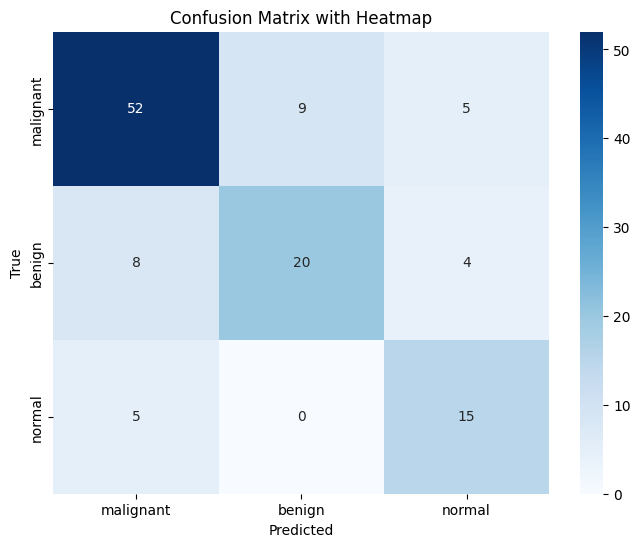

In [206]:

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Predicting the classes for test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
target_names = ['malignant', 'benign', 'normal']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Heatmap')
plt.show()

# Save the model
model.save('breast_cancer_mri_classifier.h5')

In [ ]:
import gc
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the directories
train_dir = r'..\datasets\breast_cancer\data\train'
valid_dir = r'..\datasets\breast_cancer\data\valid'
test_dir = r'..\datasets\breast_cancer\data\test'

# Define image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data normalization for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for generating the confusion matrix
)

# Initialize lists to store metrics
accuracy_list = []
recall_malignant_list = []
recall_benign_list = []

# Run the model 100 times
for i in range(10):
    print(f"Running iteration {i+1}/100")
    
    # Clear any previous models and free memory
    tf.keras.backend.clear_session()
    gc.collect()
    
    # Build the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(
        train_generator,
        epochs=20,
        validation_data=valid_generator,
        verbose=0  # Suppress verbose output for each epoch
    )

    # Evaluate the model on the test data
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(test_generator.classes, y_pred)
    
    # Calculate recall for each class
    recalls = recall_score(test_generator.classes, y_pred, average=None)
    
    # Assuming the classes are in the order of ['malignant', 'benign', 'normal']
    recall_malignant = recalls[0]  # Recall for malignant class
    recall_benign = recalls[1]     # Recall for benign class
    
    # Store metrics
    accuracy_list.append(accuracy)
    recall_malignant_list.append(recall_malignant)
    recall_benign_list.append(recall_benign)

    print(f"Iteration {i+1} - Accuracy: {accuracy:.4f}, Recall (Malignant): {recall_malignant:.4f}, Recall (Benign): {recall_benign:.4f}")

# Calculate average metrics over all iterations
average_accuracy = np.mean(accuracy_list)
average_recall_malignant = np.mean(recall_malignant_list)
average_recall_benign = np.mean(recall_benign_list)

print("\nFinal Results after 100 iterations:")
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Recall (Malignant): {average_recall_malignant:.4f}")
print(f"Average Recall (Benign): {average_recall_benign:.4f}")

# Optionally, you can save the metrics to a file
np.savez('metrics_100_iterations.npz', 
         accuracy_list=accuracy_list, 
         recall_malignant_list=recall_malignant_list, 
         recall_benign_list=recall_benign_list)


Found 545 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
Found 118 images belonging to 3 classes.
Running iteration 1/100
4/4 [==============================] - 1s 388ms/step
Iteration 1 - Accuracy: 0.7203, Recall (Malignant): 0.8182, Recall (Benign): 0.5938
Running iteration 2/100
4/4 [==============================] - 1s 151ms/step
Iteration 2 - Accuracy: 0.7712, Recall (Malignant): 0.8030, Recall (Benign): 0.7500
Running iteration 3/100
4/4 [==============================] - 1s 137ms/step
Iteration 3 - Accuracy: 0.7712, Recall (Malignant): 0.8788, Recall (Benign): 0.6875
Running iteration 4/100
4/4 [==============================] - 1s 145ms/step
Iteration 4 - Accuracy: 0.7288, Recall (Malignant): 0.7576, Recall (Benign): 0.6875
Running iteration 5/100
4/4 [==============================] - 1s 151ms/step
Iteration 5 - Accuracy: 0.7542, Recall (Malignant): 0.8030, Recall (Benign): 0.7188
Running iteration 6/100
4/4 [==============================] - 1s 131ms/

In [ ]:
import gc
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the directories
train_dir = r'..\datasets\breast_cancer\data\train_aug'
valid_dir = r'..\datasets\breast_cancer\data\valid'
test_dir = r'..\datasets\breast_cancer\data\test'

# Define image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data normalization for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for generating the confusion matrix
)

# Initialize lists to store metrics
accuracy_list = []
recall_malignant_list = []
recall_benign_list = []

# Run the model 100 times
for i in range(10):
    print(f"Running iteration {i+1}/100")
    
    # Clear any previous models and free memory
    tf.keras.backend.clear_session()
    gc.collect()
    
    # Build the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(
        train_generator,
        epochs=20,
        validation_data=valid_generator,
        verbose=0  # Suppress verbose output for each epoch
    )

    # Evaluate the model on the test data
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(test_generator.classes, y_pred)
    
    # Calculate recall for each class
    recalls = recall_score(test_generator.classes, y_pred, average=None)
    
    # Assuming the classes are in the order of ['malignant', 'benign', 'normal']
    recall_malignant = recalls[0]  # Recall for malignant class
    recall_benign = recalls[1]     # Recall for benign class
    
    # Store metrics
    accuracy_list.append(accuracy)
    recall_malignant_list.append(recall_malignant)
    recall_benign_list.append(recall_benign)

    print(f"Iteration {i+1} - Accuracy: {accuracy:.4f}, Recall (Malignant): {recall_malignant:.4f}, Recall (Benign): {recall_benign:.4f}")

# Calculate average metrics over all iterations
average_accuracy = np.mean(accuracy_list)
average_recall_malignant = np.mean(recall_malignant_list)
average_recall_benign = np.mean(recall_benign_list)

print("\nFinal Results after 100 iterations:")
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Recall (Malignant): {average_recall_malignant:.4f}")
print(f"Average Recall (Benign): {average_recall_benign:.4f}")

# Optionally, you can save the metrics to a file
np.savez('metrics_100_iterations.npz', 
         accuracy_list=accuracy_list, 
         recall_malignant_list=recall_malignant_list, 
         recall_benign_list=recall_benign_list)


Found 1635 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
Found 118 images belonging to 3 classes.
Running iteration 1/100
4/4 [==============================] - 1s 130ms/step
Iteration 1 - Accuracy: 0.7542, Recall (Malignant): 0.8333, Recall (Benign): 0.6875
Running iteration 2/100
4/4 [==============================] - 1s 125ms/step
Iteration 2 - Accuracy: 0.6949, Recall (Malignant): 0.7727, Recall (Benign): 0.5938
Running iteration 3/100
4/4 [==============================] - 1s 129ms/step
Iteration 3 - Accuracy: 0.7627, Recall (Malignant): 0.8182, Recall (Benign): 0.6875
Running iteration 4/100
4/4 [==============================] - 1s 131ms/step
Iteration 4 - Accuracy: 0.7034, Recall (Malignant): 0.7576, Recall (Benign): 0.6562
Running iteration 5/100
4/4 [==============================] - 1s 130ms/step
Iteration 5 - Accuracy: 0.7458, Recall (Malignant): 0.8788, Recall (Benign): 0.5625
Running iteration 6/100
4/4 [==============================] - 1s 126ms

Found 545 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
Found 118 images belonging to 3 classes.
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_174 (Conv2D)         (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_174 (MaxPooli  (None, 63, 63, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_175 (Conv2D)         (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_175 (MaxPooli  (None, 30, 30, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_176 (Conv2D)         (None, 28, 28, 64)        18496  

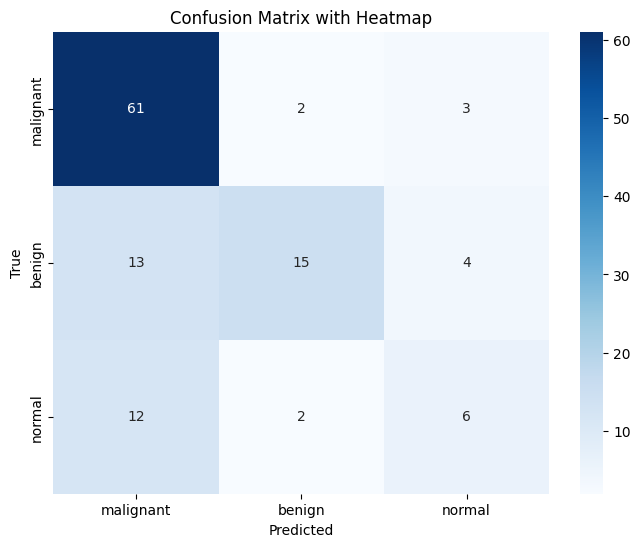

In [ ]:
import gc
gc.collect()

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the directories
train_dir = r'..\datasets\breast_cancer\data\train'
valid_dir = r'..\datasets\breast_cancer\data\valid'
test_dir = r'..\datasets\breast_cancer\data\test'

# Define image size and batch size
img_height, img_width = 128, 128  # Reduced image size
batch_size = 4  # Reduced batch size

# Data normalization for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for generating the confusion matrix
)

# Building the model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Reduced number of units
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator) // 4,  # Limit steps per epoch
    validation_steps=len(valid_generator) // 4  # Limit validation steps
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Predicting the classes for test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
target_names = ['malignant', 'benign', 'normal']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Heatmap')
plt.show()

# Save the model
model.save('breast_cancer_mri_classifier.h5')


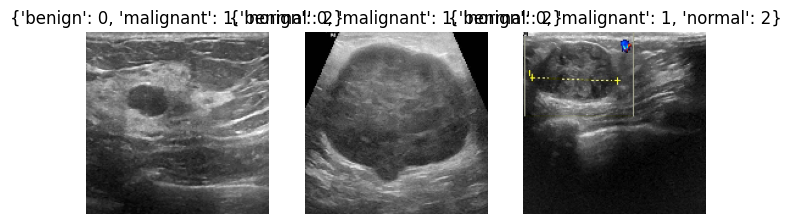

In [5]:
# Display three training images
images, labels = next(train_generator)

plt.figure(figsize=(8, 8))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.title(train_generator.class_indices)
    plt.axis('off')
plt.show()